##  Curva ROC

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('tmp/Ejemplo_04_Youtube_Spam_Dataset.csv')

df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


1. Procesamiento de los datos: convetir la  columna CONTENT a una representacion numerica con TF (Frecuencia de terminos)

In [30]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['CONTENT'])

y = df['CLASS']

2. Division de los onnjuntos de entrenamiento y evaluacion (prueba)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% entrenamiento y 20% evaluacionX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% entrenamiento y 20% evaluacion

3. Aplicar regresion Logistica

In [32]:
# Inicializando el modelo
logreg = LogisticRegression(max_iter=1000) 

# Entrenar a nuestro modelo
logreg.fit(X_train, y_train)

# Predecir probabilidades con el conjunto de pruebas
y_prob = logreg.predict_proba(X_test)[:, 1]

# Obtener score
score = logreg.score(X_test, y_test)
print(f'Score del modelo {score}')

Score del modelo 0.9387755102040817


4.Obtener curva ROC y AUC

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc}')

AUC: 0.9844802188552189


5. Vsualzacion de ROC

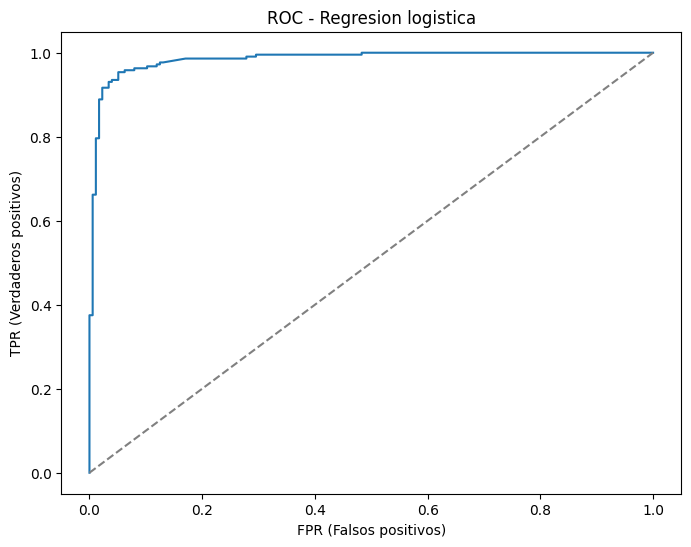

In [34]:
plt.figure(figsize=(8, 6))
label = f'ROC - AUC: {auc}'
plt.plot(fpr, tpr, label=label)
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    color='gray'
)

plt.xlabel('FPR (Falsos positivos)')
plt.ylabel('TPR (Verdaderos positivos)')
plt.title('ROC - Regresion logistica')
plt.show()